In [302]:

# Step 1: Loading and Exploring the Dataset
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay, PrecisionRecallDisplay
from sklearn.metrics import precision_recall_curve, f1_score

In [303]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, roc_auc_score, precision_score, recall_score, f1_score


In [304]:
#loading dataset
data = pd.read_csv('appendicitis.csv')

print("Column Names:", data.columns)

Column Names: Index(['Unnamed: 0', 'Age', 'BMI', 'Sex', 'Height', 'Weight', 'Length_of_Stay',
       'Alvarado_Score', 'Paedriatic_Appendicitis_Score', 'Appendix_on_US',
       'Migratory_Pain', 'Lower_Right_Abd_Pain',
       'Contralateral_Rebound_Tenderness', 'Coughing_Pain', 'Nausea',
       'Loss_of_Appetite', 'Body_Temperature', 'WBC_Count', 'Dysuria',
       'Diagnosis'],
      dtype='object')


In [305]:
# Step 2: Examining Class Imbalance
class_counts = data['Diagnosis'].value_counts()
class_proportion = class_counts / len(data)

print("\nClass Distribution:\n", class_counts)
print("\nClass Proportion:\n", class_proportion)


Class Distribution:
 Diagnosis
appendicitis       390
no appendicitis    241
Name: count, dtype: int64

Class Proportion:
 Diagnosis
appendicitis       0.618067
no appendicitis    0.381933
Name: count, dtype: float64


In [ ]:
#the 2 classes are not really imbalanced, there is a good proportion

In [306]:
#Splitting Data into Training and Testing Sets
X = data.drop(columns=['Diagnosis'])
y = data['Diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [307]:
# Baseline Model Evaluation with k-NN and Decision Tree using Cross-Validation
# Define  Cross-Validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize baseline models
knn = KNeighborsClassifier(n_neighbors=5)
#dt = DecisionTreeClassifier(random_state=42)
dt = DecisionTreeClassifier(random_state=42, max_depth=10, min_samples_split=10, min_samples_leaf=5)

In [308]:
scoring_metrics = {
    'precision': make_scorer(precision_score, pos_label='appendicitis'),
    'recall': make_scorer(recall_score, pos_label='appendicitis'),
    'f1': make_scorer(f1_score, pos_label='appendicitis'),
    'roc_auc': 'roc_auc'  # AUC-ROC can handle the label automatically for binary
}
# Evaluate k-NN with cross-validation on all metrics
knn_cv_scores = cross_validate(knn, X_train, y_train, cv=skf, scoring=scoring_metrics)

# Print k-NN scores for each metric
print("Baseline k-NN Precision Scores with Cross-Validation:", knn_cv_scores['test_precision'])
print("Baseline k-NN Mean Precision:", knn_cv_scores['test_precision'].mean())

print("Baseline k-NN Recall Scores with Cross-Validation:", knn_cv_scores['test_recall'])
print("Baseline k-NN Mean Recall:", knn_cv_scores['test_recall'].mean())

print("Baseline k-NN F1 Scores with Cross-Validation:", knn_cv_scores['test_f1'])
print("Baseline k-NN Mean F1 Score:", knn_cv_scores['test_f1'].mean())

print("Baseline k-NN AUC-ROC Scores with Cross-Validation:", knn_cv_scores['test_roc_auc'])
print("Baseline k-NN Mean AUC-ROC:", knn_cv_scores['test_roc_auc'].mean())


Baseline k-NN Precision Scores with Cross-Validation: [0.75       0.82608696 0.78181818 0.82352941 0.77192982]
Baseline k-NN Mean Precision: 0.790672874933206
Baseline k-NN Recall Scores with Cross-Validation: [0.76363636 0.7037037  0.7962963  0.76363636 0.8       ]
Baseline k-NN Mean Recall: 0.7654545454545454
Baseline k-NN F1 Scores with Cross-Validation: [0.75675676 0.76       0.78899083 0.79245283 0.78571429]
Baseline k-NN Mean F1 Score: 0.7767829396695591
Baseline k-NN AUC-ROC Scores with Cross-Validation: [0.79786096 0.79438998 0.82706972 0.84269972 0.80165289]
Baseline k-NN Mean AUC-ROC: 0.8127346549271683


In [309]:

# Evaluate Decision Tree with cross-validation on all metrics
dt_cv_scores = cross_validate(dt, X_train, y_train, cv=skf, scoring=scoring_metrics)

# Print Decision Tree scores for each metric
print("\nBaseline Decision Tree Precision Scores with Cross-Validation:", dt_cv_scores['test_precision'])
print("Baseline Decision Tree Mean Precision:", dt_cv_scores['test_precision'].mean())

print("Baseline Decision Tree Recall Scores with Cross-Validation:", dt_cv_scores['test_recall'])
print("Baseline Decision Tree Mean Recall:", dt_cv_scores['test_recall'].mean())

print("Baseline Decision Tree F1 Scores with Cross-Validation:", dt_cv_scores['test_f1'])
print("Baseline Decision Tree Mean F1 Score:", dt_cv_scores['test_f1'].mean())

print("Baseline Decision Tree AUC-ROC Scores with Cross-Validation:", dt_cv_scores['test_roc_auc'])
print("Baseline Decision Tree Mean AUC-ROC:", dt_cv_scores['test_roc_auc'].mean())


Baseline Decision Tree Precision Scores with Cross-Validation: [0.89285714 0.86440678 0.85       0.84482759 0.87272727]
Baseline Decision Tree Mean Precision: 0.8649637562904658
Baseline Decision Tree Recall Scores with Cross-Validation: [0.90909091 0.94444444 0.94444444 0.89090909 0.87272727]
Baseline Decision Tree Mean Recall: 0.9123232323232322
Baseline Decision Tree F1 Scores with Cross-Validation: [0.9009009  0.90265487 0.89473684 0.86725664 0.87272727]
Baseline Decision Tree Mean F1 Score: 0.887655304031643
Baseline Decision Tree AUC-ROC Scores with Cross-Validation: [0.91764706 0.91067538 0.92184096 0.86170799 0.94573003]
Baseline Decision Tree Mean AUC-ROC: 0.9115202830443472


In [310]:
knn.fit(X_train, y_train) # train the model using the provided training data.
y_pred_knn = knn.predict(X_test)
y_proba_knn = knn.predict_proba(X_test)[:, 1]  # Probability estimates for AUC-ROC

In [311]:
# Print classification report for k-NN
print("Baseline k-NN Classification Report:\n", classification_report(y_test, y_pred_knn, target_names=['no appendicitis', 'appendicitis']))

# Calculate and print precision, recall, F1, and AUC-ROC for k-NN
print("Baseline k-NN Precision:", precision_score(y_test, y_pred_knn, pos_label='appendicitis'))
print("Baseline k-NN Recall:", recall_score(y_test, y_pred_knn, pos_label='appendicitis'))
print("Baseline k-NN F1 Score:", f1_score(y_test, y_pred_knn, pos_label='appendicitis'))
print("Baseline k-NN AUC-ROC:", roc_auc_score(y_test, y_proba_knn))

Baseline k-NN Classification Report:
                  precision    recall  f1-score   support

no appendicitis       0.83      0.80      0.82       117
   appendicitis       0.70      0.74      0.72        73

       accuracy                           0.78       190
      macro avg       0.77      0.77      0.77       190
   weighted avg       0.78      0.78      0.78       190

Baseline k-NN Precision: 0.831858407079646
Baseline k-NN Recall: 0.8034188034188035
Baseline k-NN F1 Score: 0.8173913043478261
Baseline k-NN AUC-ROC: 0.8633064044022948


In [312]:
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
y_proba_dt = dt.predict_proba(X_test)[:, 1]  # Probability estimates for AUC-ROC

In [313]:

print("\nBaseline Decision Tree Classification Report:\n", classification_report(y_test, y_pred_dt, target_names=['no appendicitis', 'appendicitis']))

print("Baseline Decision Tree Precision:", precision_score(y_test, y_pred_dt, pos_label='appendicitis'))
print("Baseline Decision Tree Recall:", recall_score(y_test, y_pred_dt, pos_label='appendicitis'))
print("Baseline Decision Tree F1 Score:", f1_score(y_test, y_pred_dt, pos_label='appendicitis'))
print("Baseline Decision Tree AUC-ROC:", roc_auc_score(y_test, y_proba_dt))


Baseline Decision Tree Classification Report:
                  precision    recall  f1-score   support

no appendicitis       0.88      0.91      0.90       117
   appendicitis       0.86      0.81      0.83        73

       accuracy                           0.87       190
      macro avg       0.87      0.86      0.87       190
   weighted avg       0.87      0.87      0.87       190

Baseline Decision Tree Precision: 0.8842975206611571
Baseline Decision Tree Recall: 0.9145299145299145
Baseline Decision Tree F1 Score: 0.8991596638655462
Baseline Decision Tree AUC-ROC: 0.9195059126565976


In [314]:
#  Bias Mitigation for Decision Tree using Class Weights and SMOTE with Cross-Validation

# Using Class Weights for Decision Tree
dt_balanced = DecisionTreeClassifier(class_weight='balanced', random_state=42)

In [315]:
dt_balanced_cv_scores = cross_validate(dt_balanced, X_train, y_train, cv=skf, scoring=scoring_metrics)

print("Balanced Decision Tree Cross-Validation Precision:", dt_balanced_cv_scores['test_precision'].mean())
print("Balanced Decision Tree Cross-Validation Recall:", dt_balanced_cv_scores['test_recall'].mean())
print("Balanced Decision Tree Cross-Validation F1:", dt_balanced_cv_scores['test_f1'].mean())
print("Balanced Decision Tree Cross-Validation AUC-ROC:", dt_balanced_cv_scores['test_roc_auc'].mean())


Balanced Decision Tree Cross-Validation Precision: 0.8819324254031304
Balanced Decision Tree Cross-Validation Recall: 0.901144781144781
Balanced Decision Tree Cross-Validation F1: 0.89130582518433
Balanced Decision Tree Cross-Validation AUC-ROC: 0.852087542087542


In [316]:
# Train and evaluate on test set
dt_balanced.fit(X_train, y_train)
y_pred_dt_balanced = dt_balanced.predict(X_test)
y_proba_dt_balanced = dt_balanced.predict_proba(X_test)[:, 1]

In [317]:

print("\nBalanced Decision Tree Classification Report on Test Set:\n", classification_report(y_test, y_pred_dt_balanced, target_names=['no appendicitis', 'appendicitis']))
print("Balanced Decision Tree Precision on Test Set:", precision_score(y_test, y_pred_dt_balanced, pos_label='appendicitis'))
print("Balanced Decision Tree Recall on Test Set:", recall_score(y_test, y_pred_dt_balanced, pos_label='appendicitis'))
print("Balanced Decision Tree F1 Score on Test Set:", f1_score(y_test, y_pred_dt_balanced, pos_label='appendicitis'))
print("Balanced Decision Tree AUC-ROC on Test Set:", roc_auc_score(y_test, y_proba_dt_balanced))



Balanced Decision Tree Classification Report on Test Set:
                  precision    recall  f1-score   support

no appendicitis       0.87      0.94      0.91       117
   appendicitis       0.89      0.78      0.83        73

       accuracy                           0.88       190
      macro avg       0.88      0.86      0.87       190
   weighted avg       0.88      0.88      0.88       190

Balanced Decision Tree Precision on Test Set: 0.873015873015873
Balanced Decision Tree Recall on Test Set: 0.9401709401709402
Balanced Decision Tree F1 Score on Test Set: 0.9053497942386831
Balanced Decision Tree AUC-ROC on Test Set: 0.8604964289895797


In [ ]:
#great improvements in all measurements, now lets apply SMOTE

In [318]:
# Applying SMOTE for Decision Tree
#smote = SMOTE(sampling_strategy='auto', random_state=42)
smote = SMOTE(sampling_strategy=1, k_neighbors=3, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
dt_smote = DecisionTreeClassifier(random_state=42)

In [319]:
dt_smote_cv_scores = cross_validate(dt_smote, X_resampled, y_resampled, cv=skf, scoring=scoring_metrics)

print("\nSMOTE Decision Tree Cross-Validation Precision:", dt_smote_cv_scores['test_precision'].mean())
print("SMOTE Decision Tree Cross-Validation Recall:", dt_smote_cv_scores['test_recall'].mean())
print("SMOTE Decision Tree Cross-Validation F1:", dt_smote_cv_scores['test_f1'].mean())
print("SMOTE Decision Tree Cross-Validation AUC-ROC:", dt_smote_cv_scores['test_roc_auc'].mean())



SMOTE Decision Tree Cross-Validation Precision: 0.8685317909498644
SMOTE Decision Tree Cross-Validation Recall: 0.8316498316498316
SMOTE Decision Tree Cross-Validation F1: 0.8479263577482588
SMOTE Decision Tree Cross-Validation AUC-ROC: 0.8517508417508417


In [320]:
# Train and evaluate on test set
dt_smote.fit(X_resampled, y_resampled)
y_pred_dt_smote = dt_smote.predict(X_test)
y_proba_dt_smote = dt_smote.predict_proba(X_test)[:, 1]

In [321]:

print("\nSMOTE Decision Tree Classification Report on Test Set:\n", classification_report(y_test, y_pred_dt_smote, target_names=['no appendicitis', 'appendicitis']))
print("SMOTE Decision Tree Precision on Test Set:", precision_score(y_test, y_pred_dt_smote, pos_label='appendicitis'))
print("SMOTE Decision Tree Recall on Test Set:", recall_score(y_test, y_pred_dt_smote, pos_label='appendicitis'))
print("SMOTE Decision Tree F1 Score on Test Set:", f1_score(y_test, y_pred_dt_smote, pos_label='appendicitis'))
print("SMOTE Decision Tree AUC-ROC on Test Set:", roc_auc_score(y_test, y_proba_dt_smote))


SMOTE Decision Tree Classification Report on Test Set:
                  precision    recall  f1-score   support

no appendicitis       0.91      0.91      0.91       117
   appendicitis       0.85      0.85      0.85        73

       accuracy                           0.88       190
      macro avg       0.88      0.88      0.88       190
   weighted avg       0.88      0.88      0.88       190

SMOTE Decision Tree Precision on Test Set: 0.905982905982906
SMOTE Decision Tree Recall on Test Set: 0.905982905982906
SMOTE Decision Tree F1 Score on Test Set: 0.905982905982906
SMOTE Decision Tree AUC-ROC on Test Set: 0.8776489872380283


In [ ]:
#recall and f1 score have increased therefore the mitigation has worked

In [322]:
 # Step 6: Bias Mitigation for k-NN using SMOTE with Cross-Validation
# Applying SMOTE for k-NN
# Initialize k-NN model with SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
knn_smote = KNeighborsClassifier(n_neighbors=5)
# Cross-validation with multiple metrics for k-NN model with SMOTE
knn_smote_cv_scores = cross_validate(knn_smote, X_resampled, y_resampled, cv=skf, scoring=scoring_metrics)


In [323]:
# Print cross-validation scores for each metric
print("SMOTE k-NN Cross-Validation Precision:", knn_smote_cv_scores['test_precision'].mean())
print("SMOTE k-NN Cross-Validation Recall:", knn_smote_cv_scores['test_recall'].mean())
print("SMOTE k-NN Cross-Validation F1 Score:", knn_smote_cv_scores['test_f1'].mean())
print("SMOTE k-NN Cross-Validation AUC-ROC:", knn_smote_cv_scores['test_roc_auc'].mean())


SMOTE k-NN Cross-Validation Precision: 0.8330805075930934
SMOTE k-NN Cross-Validation Recall: 0.696026936026936
SMOTE k-NN Cross-Validation F1 Score: 0.7565585130448022
SMOTE k-NN Cross-Validation AUC-ROC: 0.8314888276706458


In [324]:
knn_smote.fit(X_resampled, y_resampled)
y_pred_knn_smote = knn_smote.predict(X_test)
y_proba_knn_smote = knn_smote.predict_proba(X_test)[:, 1]

In [325]:
# Print test set metrics for SMOTE-applied k-NN
print("\nSMOTE k-NN Classification Report on Test Set:\n", classification_report(y_test, y_pred_knn_smote, target_names=['no appendicitis', 'appendicitis']))
print("SMOTE k-NN Precision on Test Set:", precision_score(y_test, y_pred_knn_smote, pos_label='appendicitis'))
print("SMOTE k-NN Recall on Test Set:", recall_score(y_test, y_pred_knn_smote, pos_label='appendicitis'))
print("SMOTE k-NN F1 Score on Test Set:", f1_score(y_test, y_pred_knn_smote, pos_label='appendicitis'))
print("SMOTE k-NN AUC-ROC on Test Set:", roc_auc_score(y_test, y_proba_knn_smote))


SMOTE k-NN Classification Report on Test Set:
                  precision    recall  f1-score   support

no appendicitis       0.88      0.77      0.82       117
   appendicitis       0.69      0.84      0.76        73

       accuracy                           0.79       190
      macro avg       0.79      0.80      0.79       190
   weighted avg       0.81      0.79      0.80       190

SMOTE k-NN Precision on Test Set: 0.8823529411764706
SMOTE k-NN Recall on Test Set: 0.7692307692307693
SMOTE k-NN F1 Score on Test Set: 0.821917808219178
SMOTE k-NN AUC-ROC on Test Set: 0.8705069663973773


In [ ]:
#recall and f1 score have increased therefore the mitigation has worked

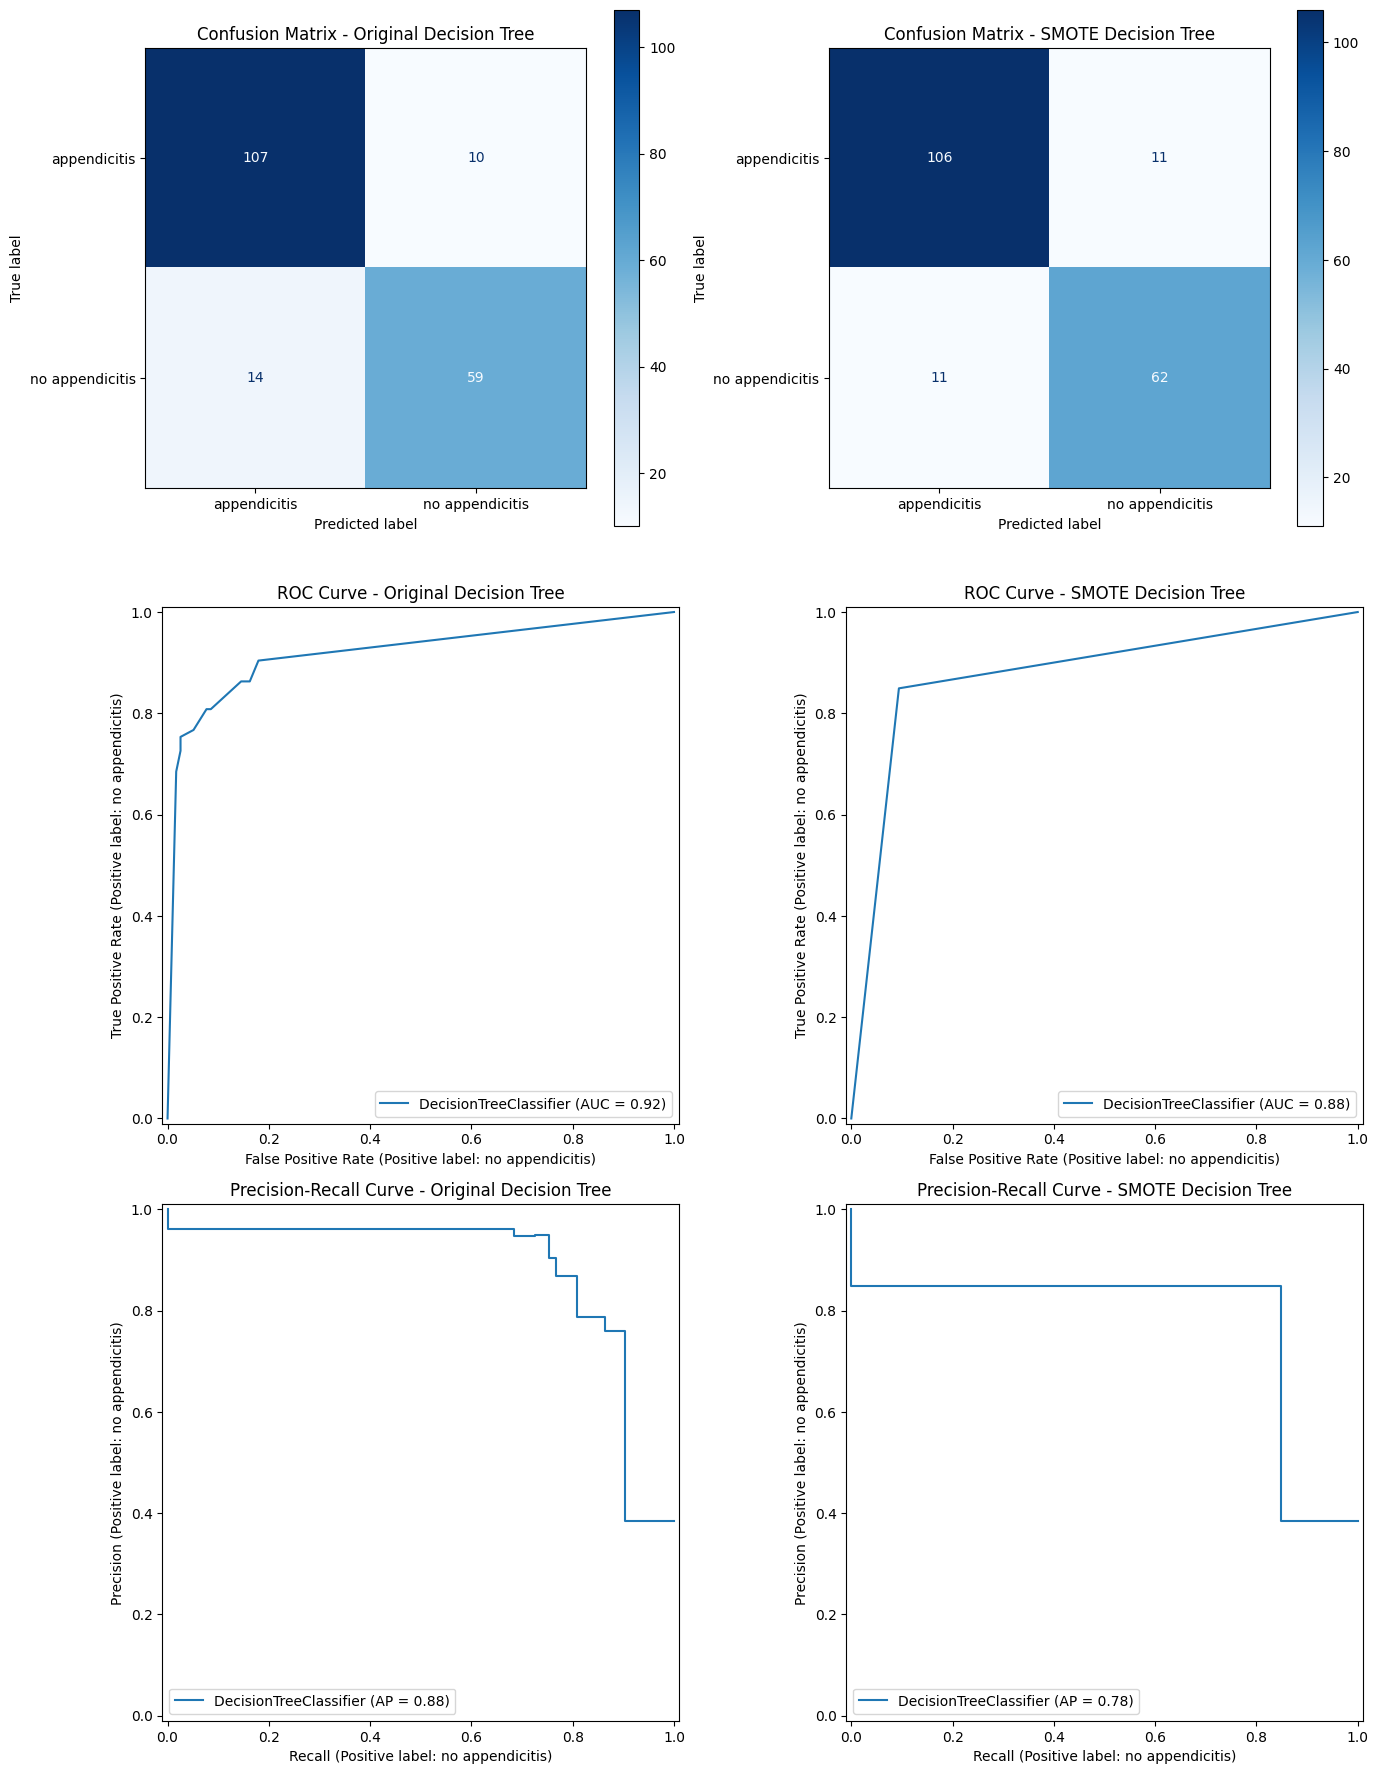

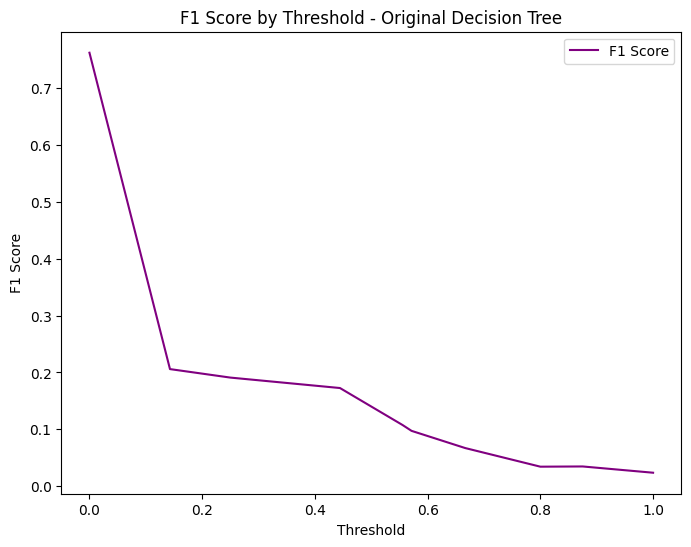

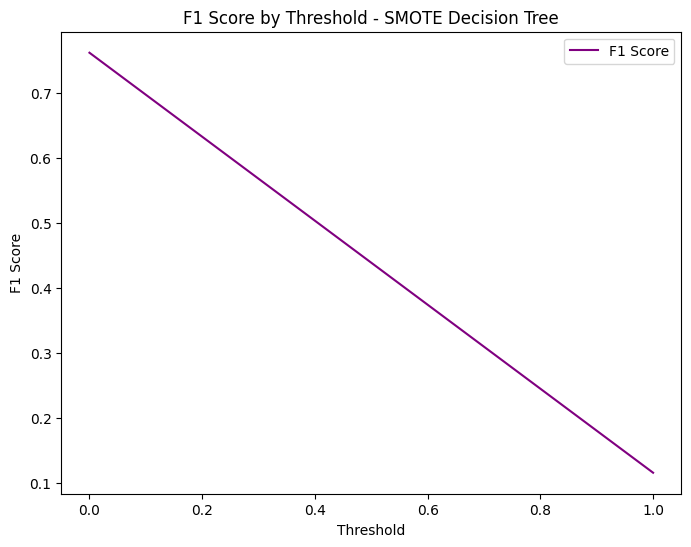

In [326]:
# Step 7: Visualizing Results with Confusion Matrix, ROC, Precision-Recall, and F1 by Threshold

# Prepare the figure for subplots
fig, axes = plt.subplots(3, 2, figsize=(14, 18))

# Confusion Matrix for Original Decision Tree
ConfusionMatrixDisplay.from_estimator(dt, X_test, y_test, ax=axes[0, 0], cmap='Blues')
axes[0, 0].set_title("Confusion Matrix - Original Decision Tree")

# Confusion Matrix for SMOTE Decision Tree
ConfusionMatrixDisplay.from_estimator(dt_smote, X_test, y_test, ax=axes[0, 1], cmap='Blues')
axes[0, 1].set_title("Confusion Matrix - SMOTE Decision Tree")

# ROC Curve for Original Decision Tree
RocCurveDisplay.from_estimator(dt, X_test, y_test, ax=axes[1, 0])
axes[1, 0].set_title("ROC Curve - Original Decision Tree")

# ROC Curve for SMOTE Decision Tree
RocCurveDisplay.from_estimator(dt_smote, X_test, y_test, ax=axes[1, 1])
axes[1, 1].set_title("ROC Curve - SMOTE Decision Tree")

# Precision-Recall Curve for Original Decision Tree
PrecisionRecallDisplay.from_estimator(dt, X_test, y_test, ax=axes[2, 0])
axes[2, 0].set_title("Precision-Recall Curve - Original Decision Tree")

# Precision-Recall Curve for SMOTE Decision Tree
PrecisionRecallDisplay.from_estimator(dt_smote, X_test, y_test, ax=axes[2, 1])
axes[2, 1].set_title("Precision-Recall Curve - SMOTE Decision Tree")

plt.tight_layout()
plt.show()

# F1 Score by Threshold Plot
def plot_f1_score_by_threshold(estimator, X_test, y_test, title="F1 Score by Threshold"):
    # Get the probabilities for the positive class
    y_proba = estimator.predict_proba(X_test)[:, 1]
    # Calculate precision, recall, and thresholds
    precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba, pos_label='appendicitis')
    # Calculate F1 scores at each threshold
    f1_scores = 2 * (precisions * recalls) / (precisions + recalls)
    # Plot F1 Score by threshold
    plt.figure(figsize=(8, 6))
    plt.plot(thresholds, f1_scores[:-1], color='purple', label="F1 Score")
    plt.xlabel("Threshold")
    plt.ylabel("F1 Score")
    plt.title(title)
    plt.legend()
    plt.show()

# Plot F1 Score by Threshold for Original and SMOTE Decision Trees
plot_f1_score_by_threshold(dt, X_test, y_test, title="F1 Score by Threshold - Original Decision Tree")
plot_f1_score_by_threshold(dt_smote, X_test, y_test, title="F1 Score by Threshold - SMOTE Decision Tree")

In [ ]:
#as we can see from the confusion matrix, makes less mistakes (from 14 to 11), and after the SMOTHE tecnique all the curve have gained much more stability, there is not a crazy improvement, but its still present